<center>
    <h1>Security System </h1>
<h3>Hari Om Umarvaishya</h3>
</center>

**Table of Contents**
1. [Importing Datasets and Libararies](#1)
2. [Pre-Processing](#2)
3. [Applying model on the dataset](#3)
4. [Own Implementation](#4)

<a id='1'><a/>
## Importing Datasets and Libararies

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\omvai\\Downloads\\Crime_Data_from_2020_to_Present.csv")

In [3]:
crime=df.copy()

<a id='2'><a/>
## Pre-Processing

In [4]:
crime.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part 1-2,Crm_Cd,Crm_Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross_Street,LAT,LON
0,10304468,01-08-2020 00:00,01-08-2020 00:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01-02-2020 00:00,01-01-2020 00:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,01-01-2020 00:00,01-01-2020 00:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,01-01-2020 00:00,01-01-2020 00:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,01-02-2020 00:00,01-01-2020 00:00,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534


In [5]:
crime.shape

(414478, 28)

In [6]:
crime.dtypes

DR_NO               int64
Date_Rptd          object
DATE_OCC           object
TIME_OCC            int64
AREA                int64
AREA_NAME          object
Rpt_Dist_No         int64
Part 1-2            int64
Crm_Cd              int64
Crm_Desc           object
Mocodes            object
Vict_Age            int64
Vict_Sex           object
Vict_Descent       object
Premis_Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross_Street       object
LAT               float64
LON               float64
dtype: object

**Deleting Unused Features**

In [7]:
del crime['Status Desc']
del crime['Status']
del crime['Crm Cd 1']
del crime['Crm Cd 2']
del crime['Crm Cd 3']
del crime['Crm Cd 4']
del crime['Crm_Cd']
del crime['Part 1-2']
del crime['Premis_Cd']
del crime['Premis Desc']
del crime['Cross_Street']
del crime['Vict_Descent']
del crime['DR_NO']

In [8]:
crime.isnull().sum()

Date_Rptd              0
DATE_OCC               0
TIME_OCC               0
AREA                   0
AREA_NAME              0
Rpt_Dist_No            0
Crm_Desc               0
Mocodes            57684
Vict_Age               0
Vict_Sex           55382
Weapon Used Cd    264777
Weapon Desc       264777
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [9]:
crime=crime[crime.Vict_Age !=0]

In [10]:
crime.loc[crime['Vict_Age'] == 0]

,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Desc,Mocodes,Vict_Age,Vict_Sex,Weapon Used Cd,Weapon Desc,LOCATION,LAT,LON


In [11]:
crime['Vict_Sex'].fillna('X',inplace=True)
crime.isnull().sum()

Date_Rptd              0
DATE_OCC               0
TIME_OCC               0
AREA                   0
AREA_NAME              0
Rpt_Dist_No            0
Crm_Desc               0
Mocodes             1947
Vict_Age               0
Vict_Sex               0
Weapon Used Cd    175227
Weapon Desc       175227
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [12]:
main = pd.DataFrame(crime, columns = ['Vict_Sex','Vict_Age','LAT','LON'])
main.head()

,Vict_Sex,Vict_Age,LAT,LON
0,F,36,34.0141,-118.2978
1,M,25,34.0459,-118.2545
2,F,76,34.1685,-118.4019
3,X,31,34.2198,-118.4468
4,F,25,34.0452,-118.2534


In [13]:
# main.info()
import seaborn as sns
#age=pd.DataFrame[age]

In [14]:
# sns.countplot(x='LAT',data=main)
# print(main['Vict_Sex'].where(main["LAT"]==0))
main.loc[main['LAT'] == 0]

,Vict_Sex,Vict_Age,LAT,LON
1143,F,56,0.0,0.0
4497,M,59,0.0,0.0
4510,F,85,0.0,0.0
4549,F,26,0.0,0.0
5756,M,21,0.0,0.0
...,...,...,...,...
402054,F,56,0.0,0.0
402416,F,51,0.0,0.0
402536,F,29,0.0,0.0
402835,M,19,0.0,0.0


In [15]:
main.loc[main['Vict_Age'] == 0]

,Vict_Sex,Vict_Age,LAT,LON


<AxesSubplot:xlabel='Vict_Sex', ylabel='count'>

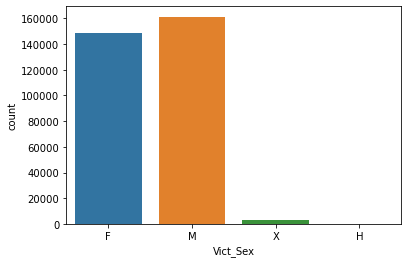

In [16]:
sns.countplot(x='Vict_Sex',data=main)

<AxesSubplot:xlabel='Vict_Age', ylabel='Density'>

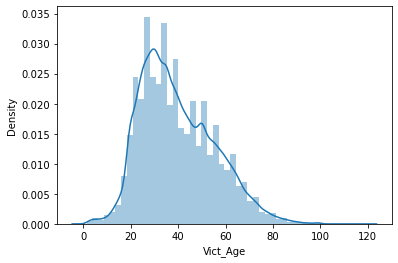

In [17]:
sns.distplot(main['Vict_Age'])

<AxesSubplot:xlabel='Vict_Age'>

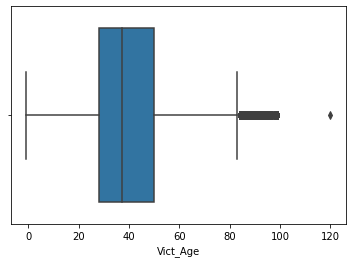

In [18]:
sns.boxplot(x=main['Vict_Age'])

In [19]:
print(main['Vict_Age'].skew())

0.5820955627464052


<AxesSubplot:xlabel='LAT', ylabel='Density'>

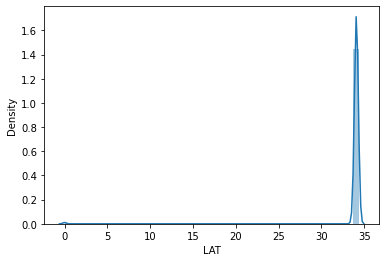

In [20]:
sns.distplot(main['LAT'])

In [21]:
# Checking min max values of lan lon
# ma = pd.DataFrame(crime, columns = ['LAT','LON'])
# ma=ma[ma.LAT !=0]
# ma=ma[ma.LON !=0]
# print(ma['LAT'].max())
# print(ma['LON'].min())

<AxesSubplot:xlabel='LON', ylabel='Density'>

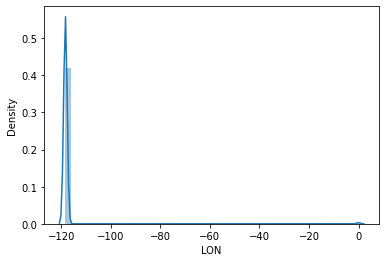

In [22]:
sns.distplot(main['LON'])

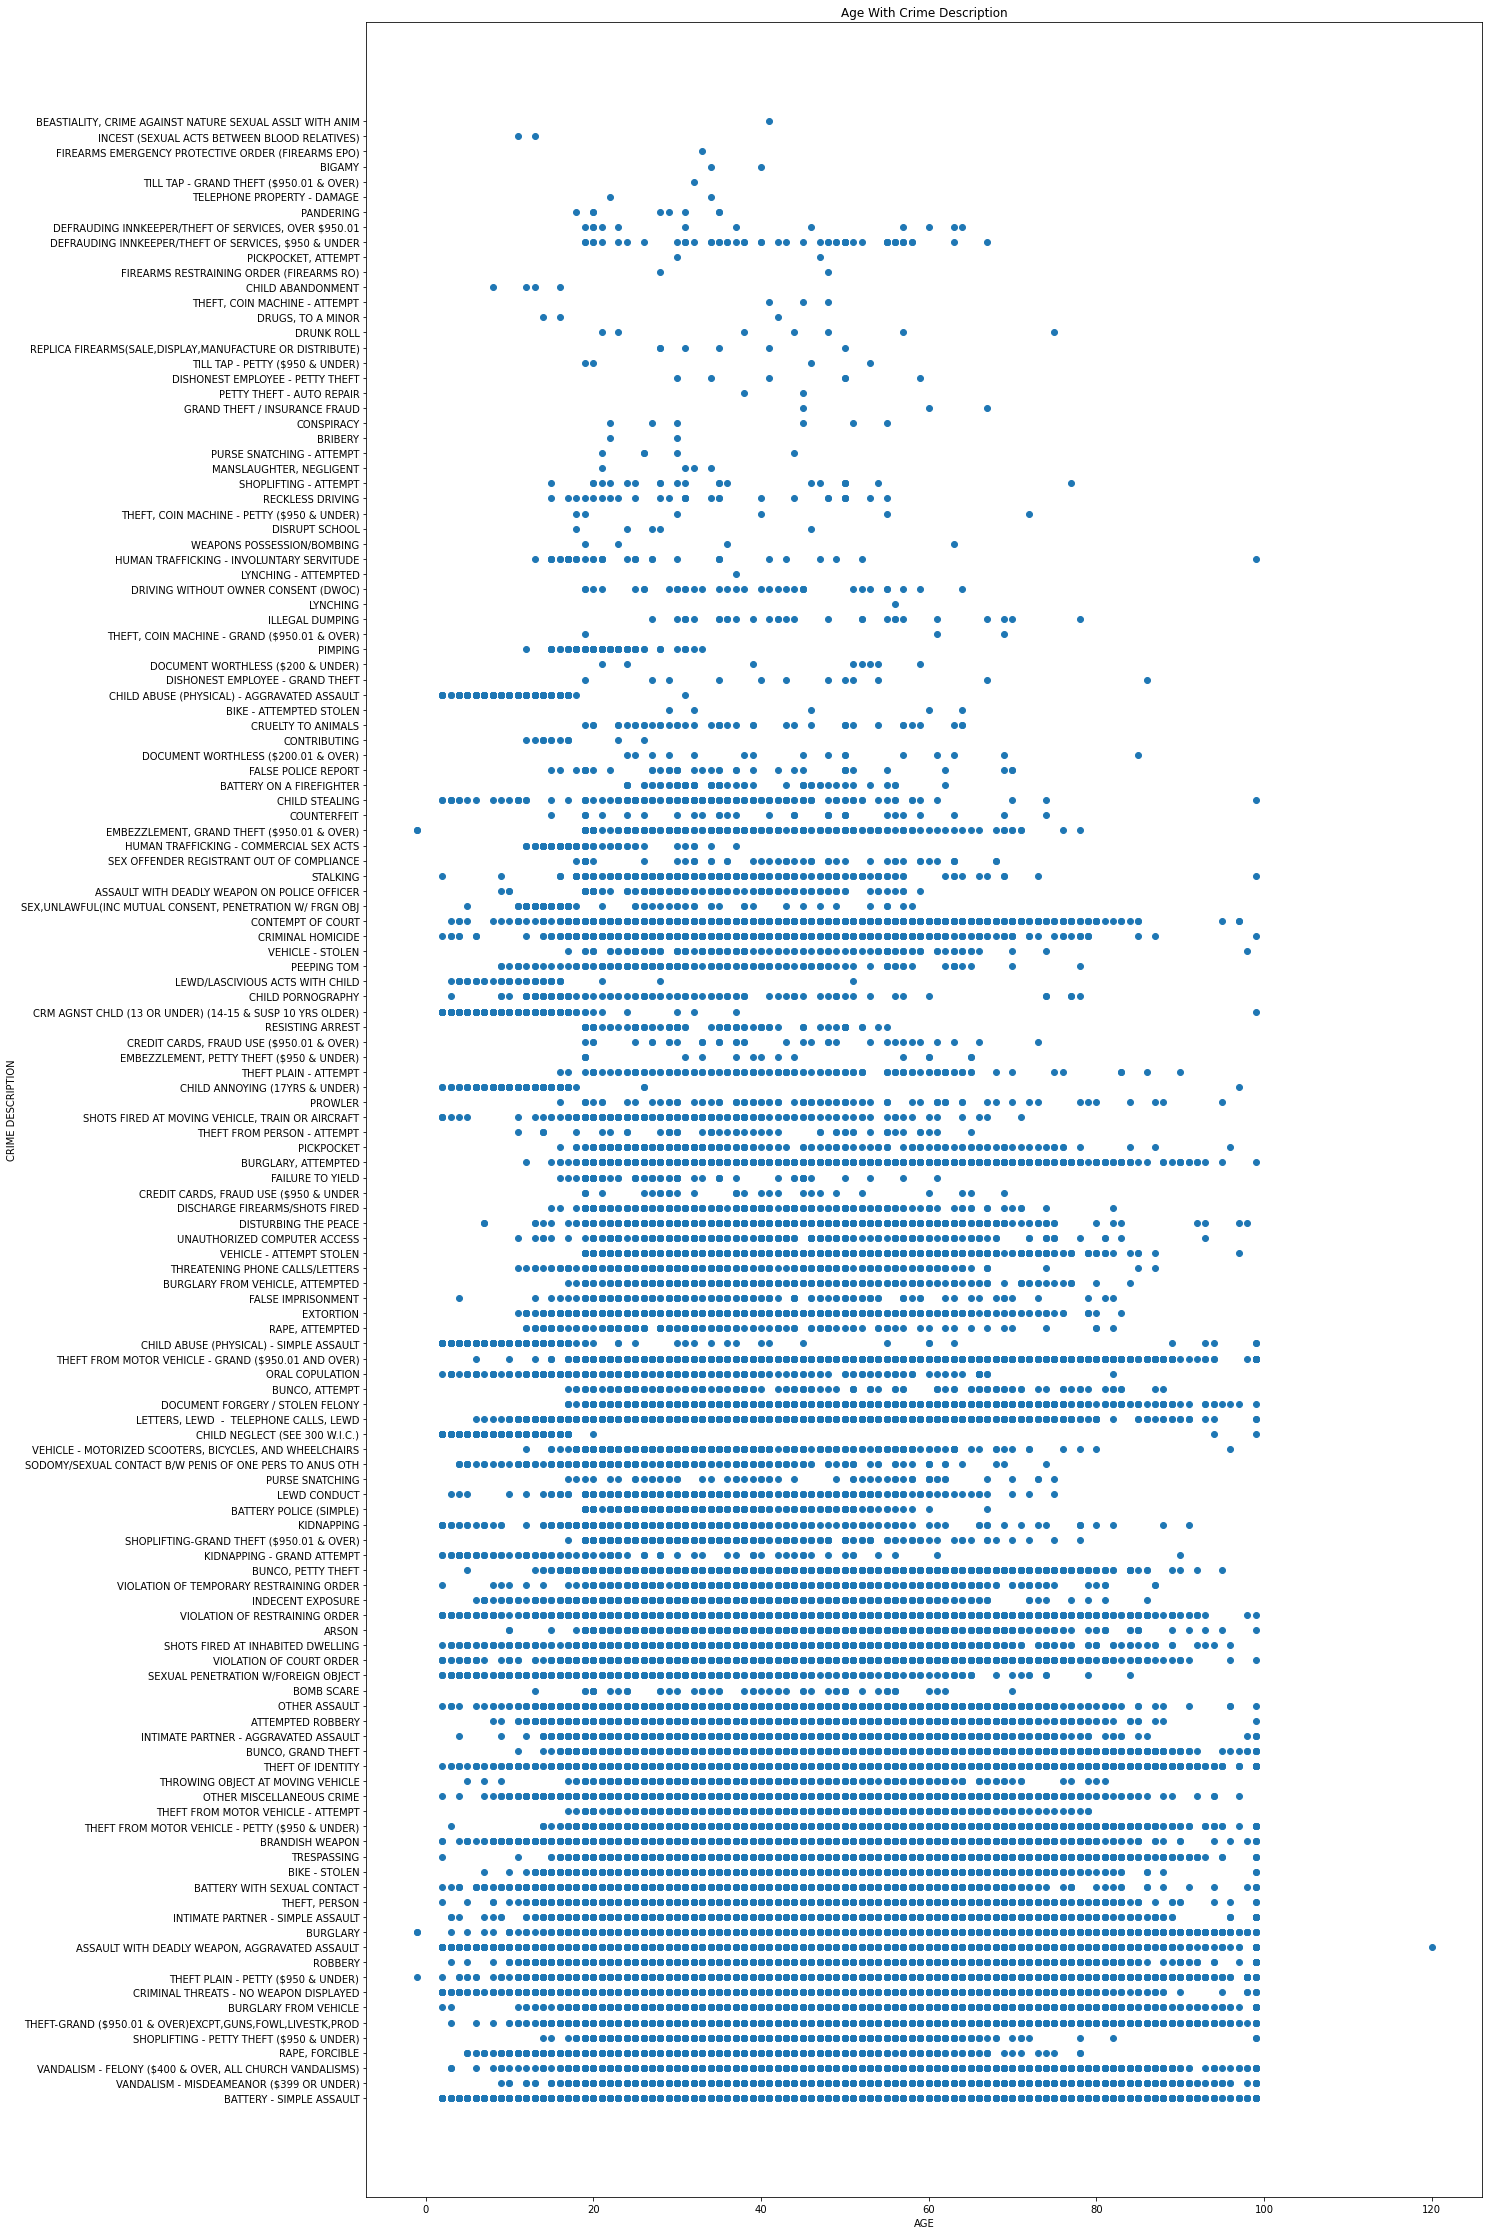

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (20,40))
ax.set_title('Age With Crime Description')
ax.scatter(x = crime['Vict_Age'], y = crime['Crm_Desc'])
ax.set_xlabel('AGE')
ax.set_ylabel('CRIME DESCRIPTION')
plt.show()

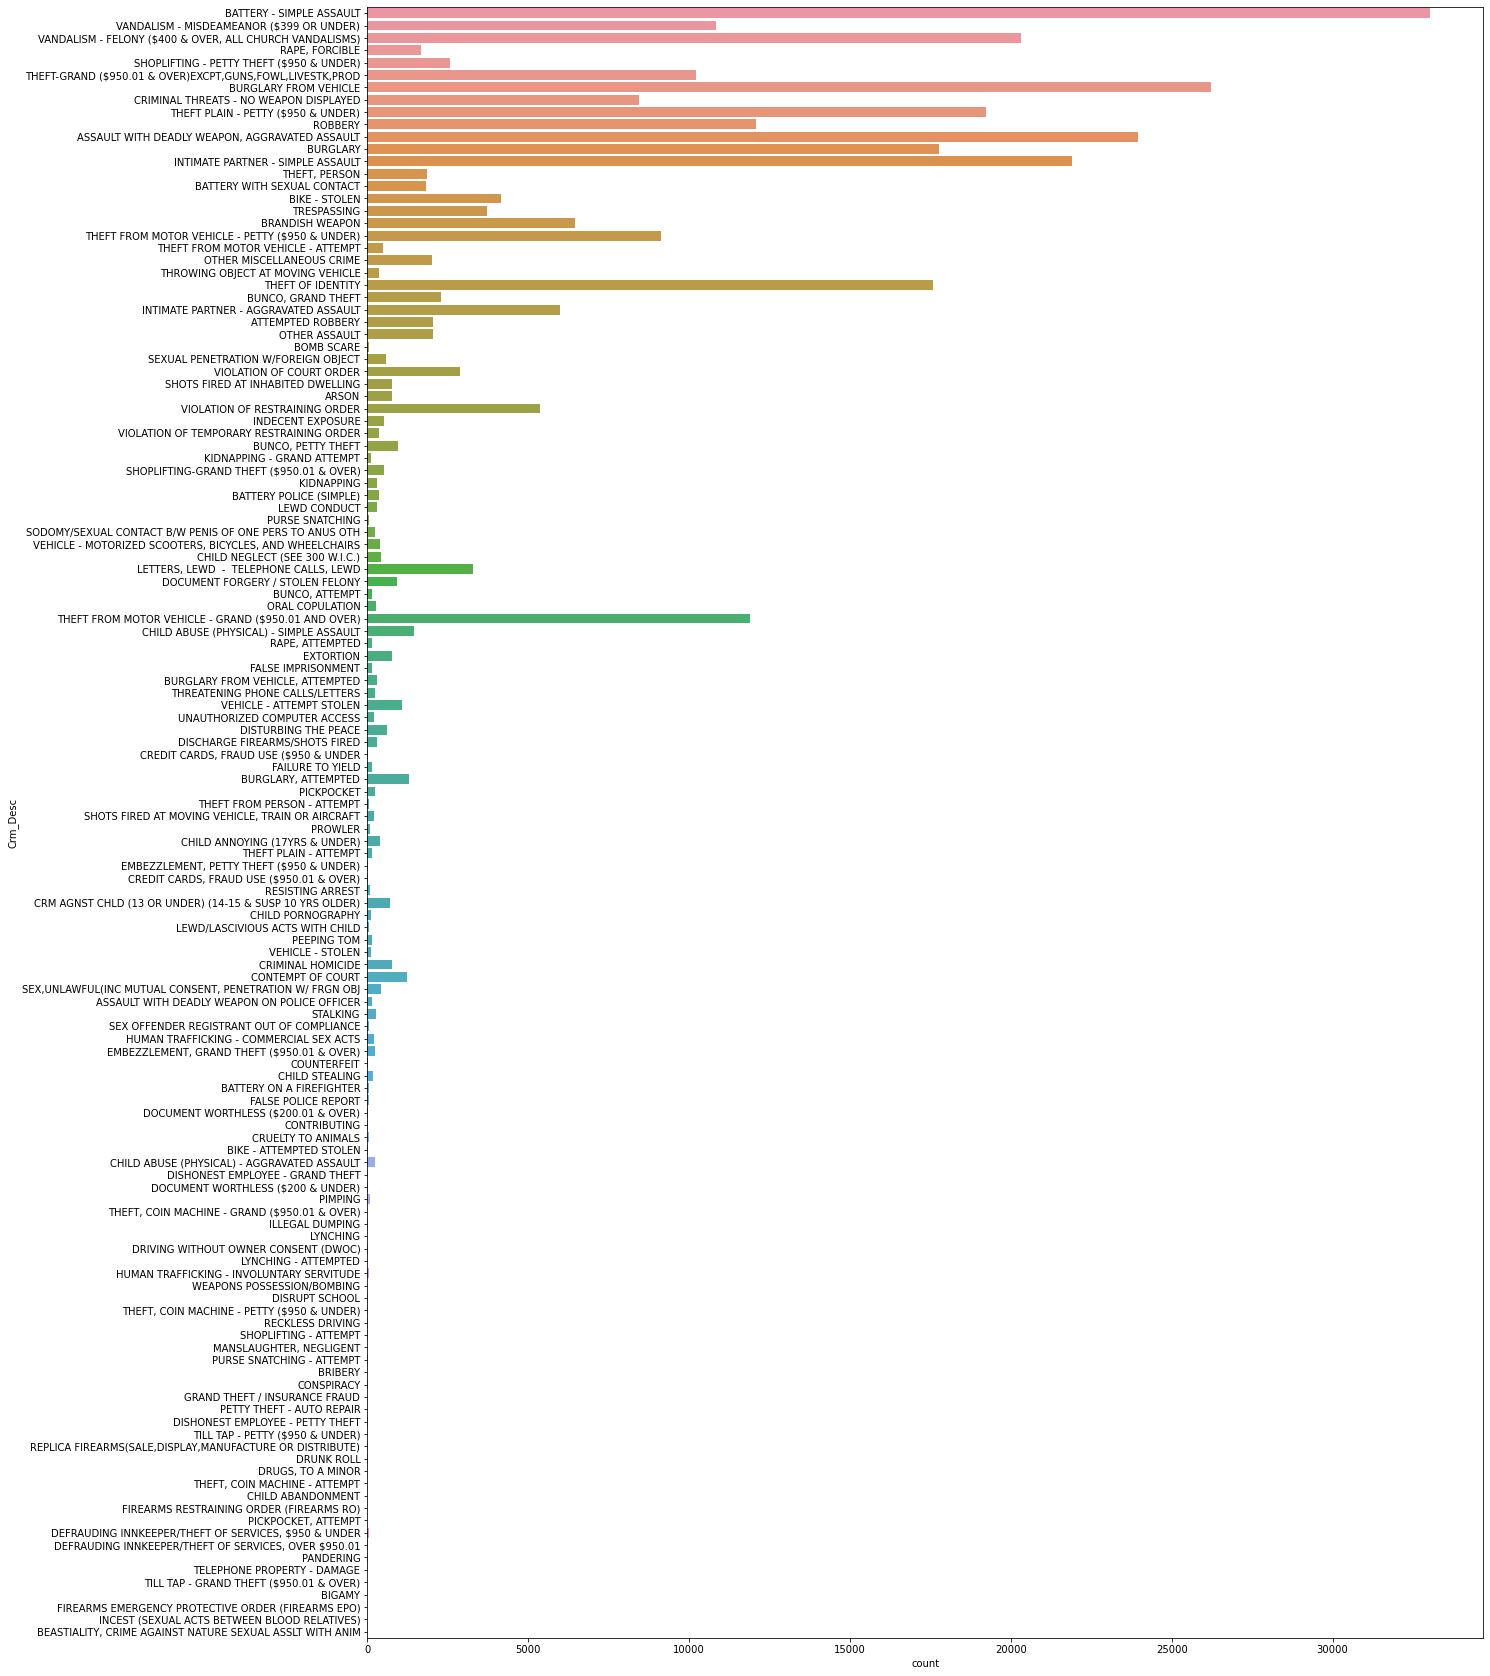

In [24]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (20,30))
sns.countplot(y='Crm_Desc',data=crime,ax=ax)
plt.show()

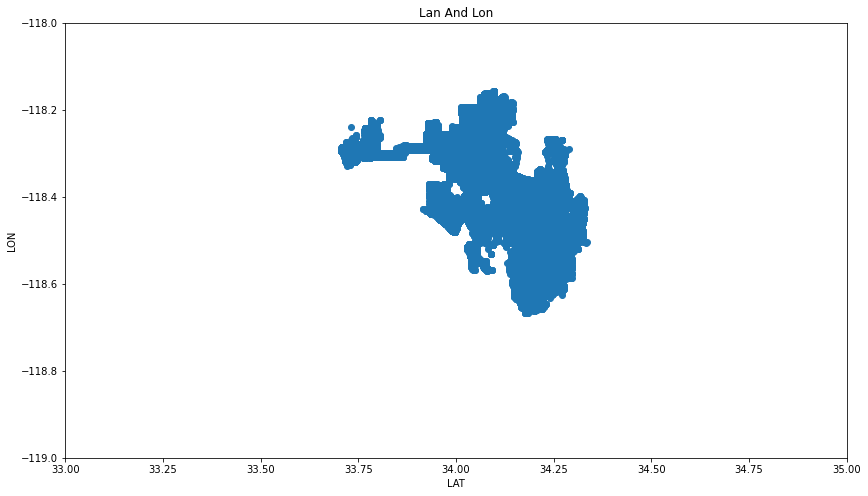

In [25]:
fig, ax = plt.subplots(1,1,figsize = (14,8))
ax.set_title('Lan And Lon')
ax.scatter(x = crime['LAT'], y = crime['LON'])
ax.set_xlabel('LAT')
ax.axis(xmin=33,xmax=35)
ax.set_ylabel('LON')
ax.axis(ymin=-119,ymax=-118)
plt.show()

<AxesSubplot:xlabel='LAT'>

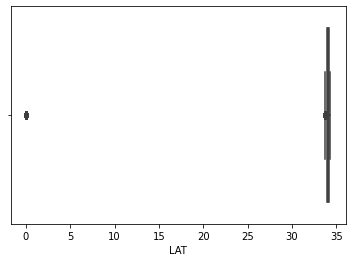

In [26]:
sns.boxplot(x=main['LAT'])

In [27]:
main.head()

,Vict_Sex,Vict_Age,LAT,LON
0,F,36,34.0141,-118.2978
1,M,25,34.0459,-118.2545
2,F,76,34.1685,-118.4019
3,X,31,34.2198,-118.4468
4,F,25,34.0452,-118.2534


In [28]:
target=crime.Crm_Desc
crime.drop('Crm_Desc',axis=1,inplace=True)
len(target)

313112

In [29]:
main['Target']=target
main.head()

,Vict_Sex,Vict_Age,LAT,LON,Target
0,F,36,34.0141,-118.2978,BATTERY - SIMPLE ASSAULT
1,M,25,34.0459,-118.2545,BATTERY - SIMPLE ASSAULT
2,F,76,34.1685,-118.4019,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,X,31,34.2198,-118.4468,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,F,25,34.0452,-118.2534,"RAPE, FORCIBLE"


#### **Increasing the data rate limit**

In [30]:
crime.iopub_data_rate_limit=100000000.0 
crime.rate_limit_window=3.0 

<a id='3'><a/>
### Appying model on the dataset

In [31]:
main.shape

(313112, 5)

In [32]:
target=main['Target']
main.drop('Target',axis=1,inplace=True)
len(target)

313112

In [33]:
main.head()

,Vict_Sex,Vict_Age,LAT,LON
0,F,36,34.0141,-118.2978
1,M,25,34.0459,-118.2545
2,F,76,34.1685,-118.4019
3,X,31,34.2198,-118.4468
4,F,25,34.0452,-118.2534


In [34]:
main.isnull().sum()

Vict_Sex    0
Vict_Age    0
LAT         0
LON         0
dtype: int64

In [35]:
main['Vict_Sex'].unique()

array(['F', 'M', 'X', 'H'], dtype=object)

**M- MALE**

**F-FEMALE**

**H-HOMOSEXUAL**

**X-PREFER NOT TO SPECIFY**

In [36]:
main['Vict_Sex'].replace(['M','F','X','H'],[0,1,2,3],inplace=True)

In [37]:
main.head()

,Vict_Sex,Vict_Age,LAT,LON
0,1,36,34.0141,-118.2978
1,0,25,34.0459,-118.2545
2,1,76,34.1685,-118.4019
3,2,31,34.2198,-118.4468
4,1,25,34.0452,-118.2534


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(main,target,test_size=.25,random_state=1)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print('\n')
y_test.head()

(234834, 4) (78278, 4) (234834,) (78278,)




382993    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
143062    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
228090    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
257304                    INTIMATE PARTNER - SIMPLE ASSAULT
262820             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: Target, dtype: object

In [40]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

clf.score(x_test, y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                                          precision    recall  f1-score   support

                                                   ARSON       0.01      0.03      0.02       200
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.07      0.17      0.10        42
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.12      0.32      0.18      6000
                                       ATTEMPTED ROBBERY       0.01      0.01      0.01       509
                                BATTERY - SIMPLE ASSAULT       0.12      0.26      0.17      8176
                                BATTERY ON A FIREFIGHTER       0.00      0.00      0.00        17
                                 BATTERY POLICE (SIMPLE)       0.05      0.09      0.07        88
                             BATTERY WITH SEXUAL CONTACT       0.03      0.04      0.04       434
                                                  BIGAMY       0.00      0.00      0.00         1
                   

<a id='4'><a/>
## Own Implementatiom


#### function to calculate distance between two locations using harvension formula on the basis of lattitude and longitude

In [41]:
from math import cos,asin,sqrt,pi
def distance(lat1,lon1,lat2,lon2):
    p=pi/180
    a=0.5-cos((lat2-lat1)*p)/2+cos(lat2*p)*(1-cos((lon2-lon1)*p))/2
    return 12742*asin(sqrt(a))

In [42]:
def pridictor(lat1,lon1):
    Distance1 =[]
    Distance2=[]
    
    # adding all latitude in Distance1 list and longitude in Distance2 list
    for i in range(len(crime.LAT)):
        Distance1.append(crime.LAT[i])
    for i in range(len(crime.LON)):
        Distance2.append(crime.LON[i])
        
    Output=[]  
    Date=crime.DATE_OCC
    SEX=crime.Vict_Sex
    Age=crime.Vict_Age
    for i in range(len(Distance1)):
        dist=distance(lat1,lon1,Distance1[i],Distance2[i])
        if(dist<.5):
            ans=[]
            ans.append(SEX[i])
            ans.append(Age[i])
            ans.append(target[i])
            Output.append(ans)
    return Output

In [43]:
def crime_detect(a, b):
    output=[] 
    a=float(a)
    b=float(b)
    
    output=pridictor(a,b)
    len(output)
    print("Number of crimes in last 2 years: " + str(len(output)))
    if(len(output)==0):
        print ("*********HIGHLY -- SECURED*********")
    elif(len(output)<=200):
        print("****SECURED****")
    elif(len(output)>200) :
        print("****SECUIRITY COMPROMISSED*****")
        for i in range(len(output)):
            print(output[i],end='\n')

**Input from user**

In [ ]:
print("Insert your Lattitude : ")
lat=input()
print("Insert your Longitude : ")
long=input()

Insert your Lattitude : 


### Function call

In [29]:
crime_detect(lat,long)

Number of crimes in last 2 years: 789
****SECUIRITY COMPROMISSED*****
['F', 36, 'BATTERY - SIMPLE ASSAULT']
['F', 31, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
['M', 19, 'CREDIT CARDS, FRAUD USE ($950 & UNDER']
['M', 26, 'CRIMINAL THREATS - NO WEAPON DISPLAYED']
['M', 36, 'INTIMATE PARTNER - SIMPLE ASSAULT']
['F', 60, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
['F', 25, 'VIOLATION OF RESTRAINING ORDER']
['F', 25, 'INTIMATE PARTNER - SIMPLE ASSAULT']
['F', 18, 'BATTERY - SIMPLE ASSAULT']
['F', 30, 'CRIMINAL THREATS - NO WEAPON DISPLAYED']
['X', 19, 'DISCHARGE FIREARMS/SHOTS FIRED']
['M', 41, 'TRESPASSING']
['F', 33, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD']
['M', 38, 'THEFT PLAIN - PETTY ($950 & UNDER)']
['M', 18, 'BRANDISH WEAPON']
['M', 26, 'BATTERY - SIMPLE ASSAULT']
['M', 54, 'BATTERY - SIMPLE ASSAULT']
['M', 28, 'BATTERY - SIMPLE ASSAULT']
['F', 35, 'INTIMATE PARTNER - SIMPLE ASSAULT']
['X', 0, 'VEHICLE - STOLEN']
['X', 0, 'THEFT F

**Testing 1 (Lat & lon of trichy(Tamil-Nadu))**

In [30]:
crime_detect(10.7905, 78.7047)

Number of crimes in last 2 years: 0
*****YOU DON'T LIVE IN USA LOL !!!*****


**Testing 2 (Lat & lon of vermort(USA))**

In [45]:
crime_detect(35.1495,90.0490)

Number of crimes in last 2 years: 0
*****YOU DON'T LIVE IN USA LOL !!!*****


**Testing 3 (Lat & lon of Hollywood(USA))**

In [34]:
crime_detect(34.1685,-118.4019)

Number of crimes in last 2 years: 462
****SECUIRITY COMPROMISSED*****
['F', 76, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']
['M', 28, 'ROBBERY']
['F', 80, 'CONTEMPT OF COURT']
['M', 52, 'INTIMATE PARTNER - SIMPLE ASSAULT']
['F', 29, 'BURGLARY FROM VEHICLE']
['M', 26, 'THEFT PLAIN - PETTY ($950 & UNDER)']
['F', 49, 'BURGLARY FROM VEHICLE']
['M', 41, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
['F', 30, 'BURGLARY']
['F', 56, 'BURGLARY FROM VEHICLE']
['M', 41, 'INTIMATE PARTNER - AGGRAVATED ASSAULT']
['F', 54, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']
['M', 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
['F', 26, 'INTIMATE PARTNER - SIMPLE ASSAULT']
['F', 63, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)']
['F', 73, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
['F', 31, 'BURGLARY FROM VEHICLE']
['F', 45, 'BURGLARY FROM VEHICLE']
['X', 0, 'VEHICLE - STOLEN']
['M', 30, 'BURGLARY FROM VEHICLE']
['F', 27, 'BRANDISH WEAPON']
['M', 57, 'BATTERY -

** **